In [19]:
from qiskit import *
from qiskit_ibm_runtime import QiskitRuntimeService
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram
import time

In [20]:
with open('ibmapi.txt', 'r') as file:
    token = file.read().strip()

QiskitRuntimeService.save_account(
    token = token,
    instance = "Practice",
    set_as_default = True,
    overwrite = True
)
service = QiskitRuntimeService()

In [21]:
for backend in service.backends():
    name = backend.name
    qubits = backend.num_qubits
    status = backend.status().operational
    pending_jobs = backend.status().pending_jobs
    print(f"{name:20} | Qubits: {qubits} | Operational: {status} | Pending Jobs: {pending_jobs}")

ibm_torino           | Qubits: 133 | Operational: True | Pending Jobs: 5296
ibm_brisbane         | Qubits: 127 | Operational: True | Pending Jobs: 2084


In [22]:
q_reg = QuantumRegister(3, 'q')
c_reg = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(q_reg, c_reg)
circuit.x(0)
circuit.x(1)
circuit.ccx(0, 1, 2)
circuit.measure(q_reg, c_reg)

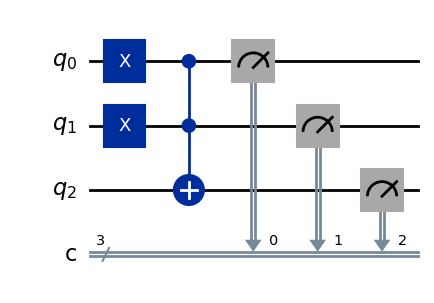

In [23]:
circuit.draw('mpl')

In [24]:
backend = service.backend("ibm_brisbane")
transpiled_qc = transpile(circuit, backend=backend)

In [25]:
sampler = Sampler(backend)
# need to pass a list of circuits to `sampler.run()`, even if you have only one circuit.

job = sampler.run([transpiled_qc], shots=1024)
while not job.done():
    print(f"Job is still running. Current status: {job.status()}")
    time.sleep(2)  # Wait for 10 seconds before checking again

job.wait_for_final_state()
print(f"Job completed with status: {job.status()}")

Job is still running. Current status: QUEUED
Job is still running. Current status: RUNNING
Job completed with status: DONE


In [26]:
result = job.result()

In [27]:

bitvals = result[0].data.c  

counts = bitvals.get_counts()

print(counts)

{'111': 819, '110': 59, '101': 27, '010': 12, '011': 85, '001': 14, '100': 4, '000': 4}


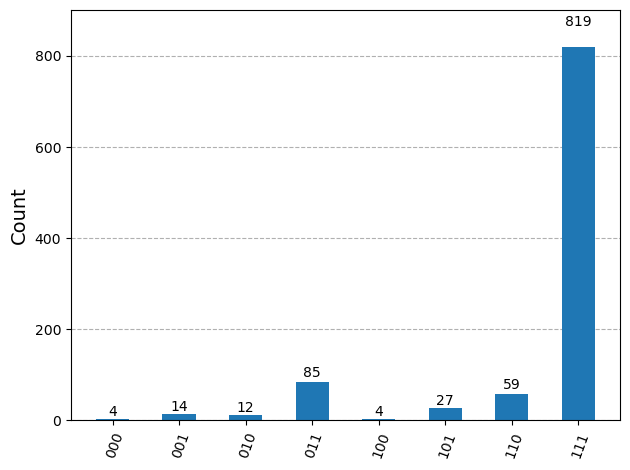

In [28]:

plot_histogram(counts)